Atividades do case 2  - EDA



*   Carregar os arquivos: cadastro, contato, detalhes, inadimplencia e subscricao (existem formatos diferentes de dados csv e xlsx);
*   Realizar uma EDA nas bases em separado, seguindo o padrão de univariada, bivariada e multivariada;
* Cruzar todas as bases de modo que os Id's deem match e depois realizar uma nova anális exploratória buscando entender as relações das variáveis;
* Apresentar uma conclusão das análises de modo que ajudem a entender os dados
* a nossa variável de interesse é a subscrição, fazer as análises de modo que possamos entender quais variáveis mais influenciam nela;
* Usar as descritivas básicas, boxplots e histogramas para descrever as variáveis;
* Na conclusão trazer percepções que sejam relevantes para negócio;





In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

### Carregar os arquivos: cadastro, contato, detalhes, inadimplencia e subscricao (existem formatos diferentes de dados csv e xlsx);


In [6]:
df_cadastro = pd.read_csv('cadastro.csv', sep=';')
df_cadastro.drop(columns='Unnamed: 0', inplace=True)

df_contato  = pd.read_excel('contato.xlsx')
df_contato.drop(columns='Unnamed: 0', inplace=True)

df_detalhes = pd.read_csv('detalhes.csv', sep=';')
df_detalhes.drop(columns='Unnamed: 0', inplace=True)

df_inadimplencia = pd.read_csv('inadimplencia.csv')
df_inadimplencia.drop(columns='Unnamed: 0', inplace=True)

df_subscricao = pd.read_csv('subscricao.csv')
df_subscricao.drop(columns='Unnamed: 0', inplace=True)

In [7]:
df_cadastro.shape 

(32950, 6)

In [8]:
df_cadastro.dtypes

ID             object
ocupacao       object
estadoCivil    object
educacao       object
creditoImob    object
emprestimo     object
dtype: object

In [9]:
df_contato.shape

(32950, 3)

In [10]:
df_contato.dtypes

ID          object
contatos    object
duracao      int64
dtype: object

In [11]:
df_detalhes.shape

(32950, 5)

In [12]:
df_detalhes.dtypes

ID                   object
contatoCampanha       int64
diasDesde             int64
anterior              int64
resultadoAnterior    object
dtype: object

In [13]:
df_inadimplencia.shape

(32950, 2)

In [14]:
df_inadimplencia.dtypes

ID               object
inadimplência     int64
dtype: object

In [15]:
df_subscricao.shape

(32950, 2)

In [16]:
df_subscricao.dtypes

ID            object
subscricao     int64
dtype: object

### Realizar uma EDA nas bases em separado, seguindo o padrão de univariada, bivariada e multivariada;


In [17]:
def plot_graph_with_percentage(fg):
    fg.set_xticklabels(rotation=90)

    for ax in fg.axes.ravel():
        for c in ax.containers:
            labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]

            ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)

        ax.margins(y=0.2)
    plt.show()

## Cadastro

In [18]:
df_cadastro.head()

,ID,ocupacao,estadoCivil,educacao,creditoImob,emprestimo
0,e0bdea26-ac80-482e-90a7-9accc402e3ef,operario,married,fundamental,0,0
1,869221fb-841d-4e45-9c90-c3b96a3e964e,empreendedor,married,graduacao,0,0
2,946b21f9-30c8-41af-a892-3154b86ff73d,Autonomo,married,primario incompleto,0,0
3,27b04d91-a83a-4d27-a1f4-c5032dcf21df,administrador,married,graduacao,1,0
4,760d6808-c51c-40c7-b442-5c18e10201e6,Autonomo,divorced,graduacao,0,0


**Distribuição das colunas da base cadastro**

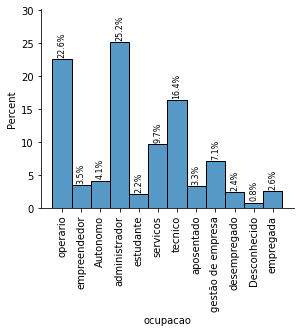

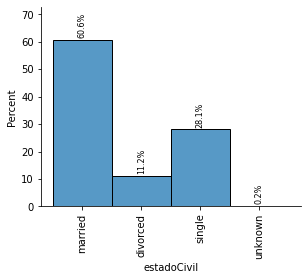

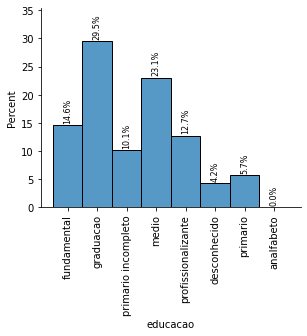

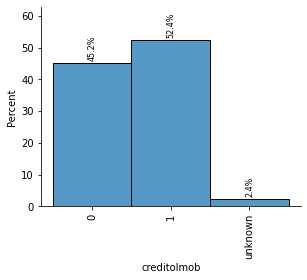

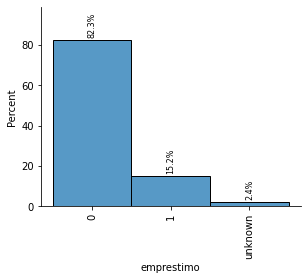

In [19]:
lista_cols = ['ocupacao', 'estadoCivil', 'educacao','creditoImob', 'emprestimo']

for col in lista_cols:
    fg = sns.displot(df_cadastro, x=col, stat='percent', height=3.5, aspect=1.25)
    plot_graph_with_percentage(fg)

**Análise da ocupação, estado civil e educação para o créditoImob e emprestimo da base cadastro**

In [51]:
def aed_multiple_features(col, emp, df):
    
    df_total = df.groupby([col], as_index=False)[emp].count()
    df_total.rename(columns={emp: 'total'}, inplace=True)
    df_aux = df.groupby([col, emp], as_index=False)['ID'].count()

    df_total = df_aux.merge(df_total, on=col, how='left')
    df_total['percentual'] = df_total['ID']/df_total['total']
    fg = sns.histplot(df_total, x=col, hue=emp, weights='percentual',
             multiple='stack', shrink=0.8)
    plt.xticks(rotation=90)

    plt.show()

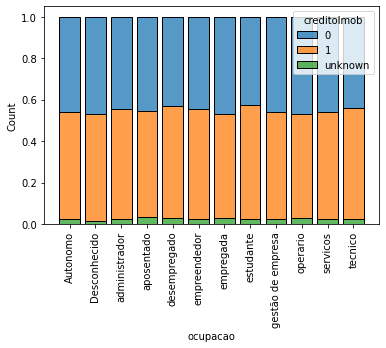

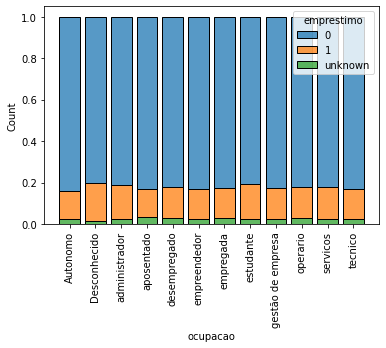

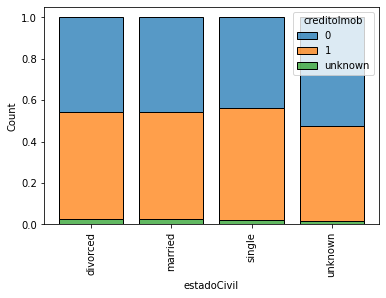

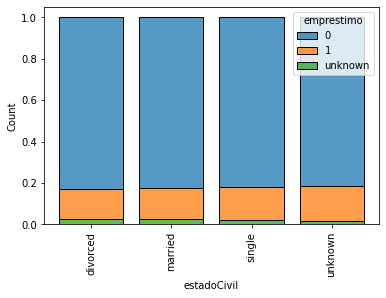

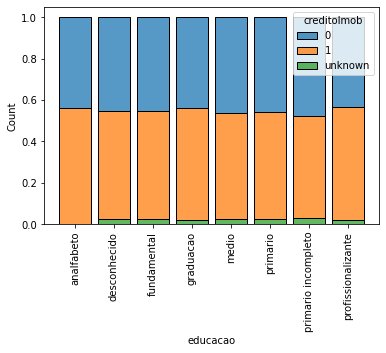

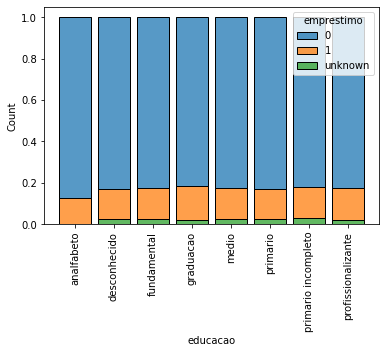

In [52]:
lista_cols = ['ocupacao', 'estadoCivil', 'educacao']
var_emp = ['creditoImob', 'emprestimo']

for col in lista_cols:
    for emp in var_emp:
        aed_multiple_features(col, emp, df_cadastro)
        

**Análise variáveis contato**

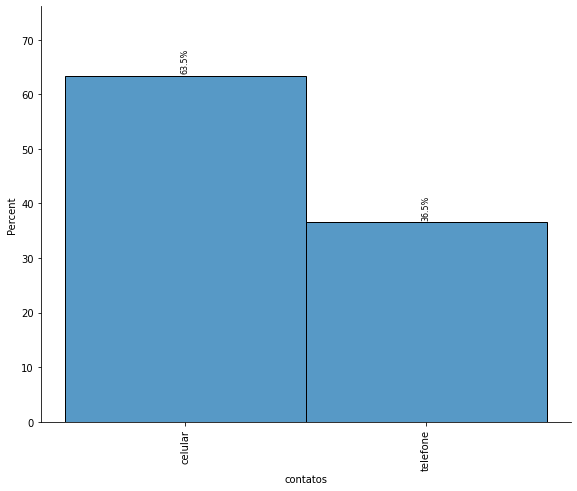

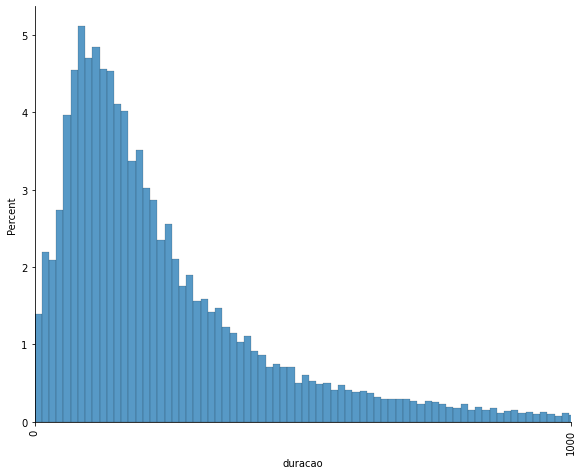

In [53]:
lista_cols = ['contatos', 'duracao']

for col in lista_cols:
    fg = sns.displot(df_contato, x=col, stat='percent', height=6.5, aspect=1.25)
    if 'duracao' in col:
        fg.set_xticklabels(rotation=90)
        fg.set(xlim=(0, 1000))
        plt.plot()
    else:
        plot_graph_with_percentage(fg)

In [54]:
df_contato['log_duracao'] = np.log(df_contato['duracao'])

/home/rosana/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[]

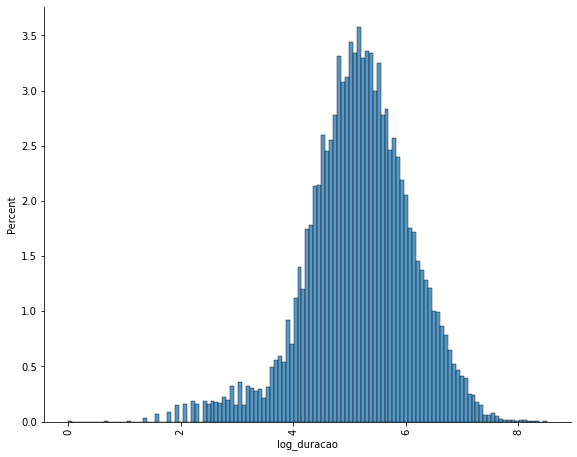

In [55]:
fg = sns.displot(df_contato, x='log_duracao', stat='percent', height=6.5, aspect=1.25)
fg.set_xticklabels(rotation=90)
plt.plot()

<AxesSubplot:xlabel='contatos', ylabel='log_duracao'>

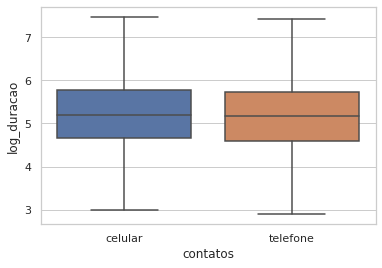

In [56]:
sns.set(style="whitegrid")
sns.boxplot(x="contatos",y="log_duracao", data=df_contato, showfliers=False)

<AxesSubplot:xlabel='contatos', ylabel='duracao'>

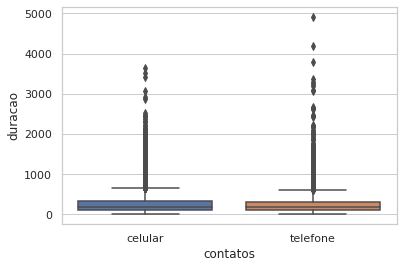

In [57]:
sns.set(style="whitegrid")
sns.boxplot(x="contatos",y="duracao", data=df_contato)

<AxesSubplot:xlabel='contatos', ylabel='duracao'>

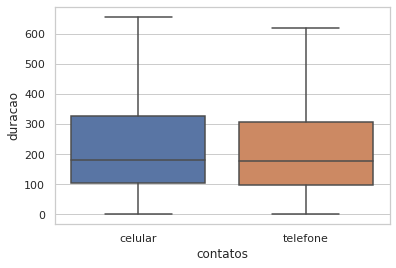

In [58]:
sns.set(style="whitegrid")
sns.boxplot(x="contatos",y="duracao", data=df_contato, showfliers=False)

In [59]:
df_contato['duracao'].describe()

count    32950.000000
mean       258.127466
std        258.975917
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duracao, dtype: float64

**Análise base detalhes**

In [60]:
df_detalhes.head()

,ID,contatoCampanha,diasDesde,anterior,resultadoAnterior
0,0aef4d9c-3fcb-4f49-829d-a92d9b513494,5,999,0,Não existe
1,75e7cb37-5603-4556-86e2-f051ab1655fa,1,999,0,Não existe
2,e1f11a4c-6d6c-4931-8220-f2ca00b9b89b,1,999,0,Não existe
3,fbcd8c13-2a82-4808-a629-189f651a0de2,4,999,0,Não existe
4,f6a72399-5de8-4f19-9a6d-ee66486146b4,21,999,0,Não existe


In [61]:
df_detalhes.loc[df_detalhes['resultadoAnterior']=='falha']

,ID,contatoCampanha,diasDesde,anterior,resultadoAnterior
16,9a0292d3-152b-4962-abb3-077990283706,1,999,1,falha
21,012c652d-a31f-4b9e-b86c-7ac2138d3afa,8,999,1,falha
39,dde6a7f1-9cfe-4e37-acea-c77c92027e76,1,999,1,falha
74,dd9233ec-6ce3-449d-a4c3-493884af8e1c,1,999,1,falha
83,6ebb68ed-f06e-4c8e-9dd1-f3a1ffd7057d,4,999,1,falha
...,...,...,...,...,...
32901,accb9664-d403-4df7-884c-6f9ca427f546,1,999,1,falha
32909,c97051db-f0cf-42ae-ba93-ba1cfe63a542,2,999,1,falha
32915,caf65c04-4db2-4933-830e-037b0edb8bc6,1,999,1,falha
32922,ae650cc5-1fb2-4b84-8833-8b5ad399e89f,2,999,1,falha


In [62]:
df_detalhes.loc[(df_detalhes['resultadoAnterior']=='falha'),'anterior'].unique()

array([1, 3, 2, 4, 6, 5])

In [63]:
df_detalhes.loc[(df_detalhes['resultadoAnterior']=='falha'),'diasDesde'].unique()

array([999,   6,  17,   9,   3,  14,   8,   5,  12,  13,  20,  15,   7,
        10,  11,  18,  19,  21,  25,  16,   4])

In [64]:
df_detalhes.loc[(df_detalhes['resultadoAnterior']=='falha') & (df_detalhes['diasDesde']!=999)]

,ID,contatoCampanha,diasDesde,anterior,resultadoAnterior
389,5dace286-4fe2-4186-a963-90fc510fdc54,1,6,2,falha
648,da649d6f-1088-49b2-acfb-888dc50d69ac,1,17,2,falha
770,4af815f0-7dd0-4e14-b7bf-6c500b1bb0ee,1,9,2,falha
984,627902aa-4619-4e5f-aede-0d8abb750293,2,3,2,falha
998,e7657874-2c8e-451a-b950-81fafda9ca99,2,14,2,falha
...,...,...,...,...,...
31607,9a472cd7-c7ae-424a-9123-9617422dc78d,1,9,2,falha
31702,f57cb87c-2e31-4403-8c0a-694f841be858,2,12,2,falha
31707,9f4527b4-aa0e-49fe-8667-be0d08fccb37,2,9,2,falha
31786,e06f8155-c3ad-4172-915b-7b4371e40cd0,1,17,4,falha


In [65]:
df_detalhes.loc[(df_detalhes['contatoCampanha']==7) & (df_detalhes['diasDesde']!=999)]

,ID,contatoCampanha,diasDesde,anterior,resultadoAnterior
6977,312c6f01-b230-4c15-bbd3-f15b9c300565,7,11,2,sucesso
8672,d1e50f5f-86aa-4712-97b7-2b218f6108d7,7,2,1,sucesso
17894,ce84abcf-9f3a-4ed6-baba-e786ae21dba1,7,6,2,sucesso
18320,07fd20f0-038b-425f-a1db-4086cdf34876,7,6,1,sucesso
19767,54a3f5d9-98fe-46d3-9808-a1042c5a6d3b,7,6,3,sucesso
19867,4102f313-9685-4ddf-bff7-08f16ae4c206,7,1,2,sucesso
28866,40ae9052-ebaa-44d5-bf09-ac9086aa1596,7,3,5,sucesso
30220,76afeb77-89b6-477b-8eac-78b6321d45d5,7,6,1,sucesso


In [66]:
df_detalhes.loc[(df_detalhes['resultadoAnterior']=='Não existe')]

,ID,contatoCampanha,diasDesde,anterior,resultadoAnterior
0,0aef4d9c-3fcb-4f49-829d-a92d9b513494,5,999,0,Não existe
1,75e7cb37-5603-4556-86e2-f051ab1655fa,1,999,0,Não existe
2,e1f11a4c-6d6c-4931-8220-f2ca00b9b89b,1,999,0,Não existe
3,fbcd8c13-2a82-4808-a629-189f651a0de2,4,999,0,Não existe
4,f6a72399-5de8-4f19-9a6d-ee66486146b4,21,999,0,Não existe
...,...,...,...,...,...
32944,002ab07d-f235-4efe-81f9-971036a637a2,8,999,0,Não existe
32945,301b0099-0e96-4279-b226-8f7d68e4fcce,1,999,0,Não existe
32946,5bf9db42-699f-45e7-a099-1d54c501b95b,4,999,0,Não existe
32948,511b27fc-f42d-48ad-89d2-1f791d7755ab,7,999,0,Não existe


In [67]:
df_detalhes.loc[(df_detalhes['resultadoAnterior']=='Não existe'),'anterior'].unique()

array([0])

In [68]:
df_detalhes.loc[(df_detalhes['resultadoAnterior']=='Não existe'),'diasDesde'].unique()

array([999])

In [69]:
df_detalhes['contatoCampanha'].unique()
# contatoCampanha qtd de ligações

array([ 5,  1,  4, 21,  2,  8,  9,  3,  6, 22, 16,  7, 17, 10, 14, 12, 18,
       28, 11, 15, 19, 32, 13, 31, 24, 33, 20, 27, 30, 26, 25, 23, 42, 40,
       29, 35, 37, 43, 34, 56])

In [70]:
df_detalhes['diasDesde'].unique()
# diasDesde qtd de dias desde primeiro contato

array([999,   3,   4,  13,   6,   9,   2,  11,  10,  17,  12,   7,  14,
         0,   5,   8,   1,  16,  15,  20,  22,  19,  27,  18,  21,  25,
        26])

In [71]:
df_detalhes['anterior'].unique()

array([0, 2, 1, 3, 6, 4, 5, 7])

In [72]:
df_detalhes['resultadoAnterior'].unique()

array(['Não existe', 'sucesso', 'falha'], dtype=object)

In [73]:
df_detalhes['diasDesde'].value_counts()/df_detalhes.shape[0]

999    0.962792
3      0.010774
6      0.010228
4      0.002944
2      0.001578
7      0.001426
9      0.001366
10     0.001305
12     0.001214
5      0.001214
13     0.000850
1      0.000668
11     0.000637
15     0.000637
14     0.000546
8      0.000425
0      0.000364
16     0.000273
17     0.000243
18     0.000182
22     0.000091
19     0.000061
21     0.000061
20     0.000030
27     0.000030
25     0.000030
26     0.000030
Name: diasDesde, dtype: float64

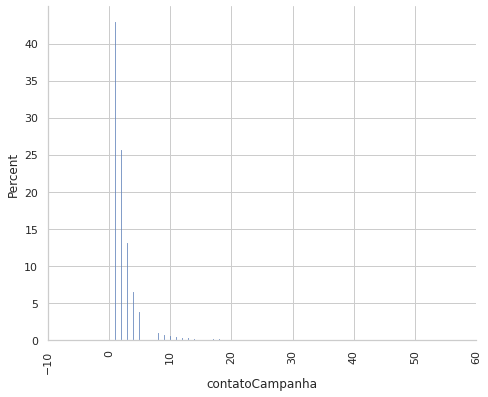

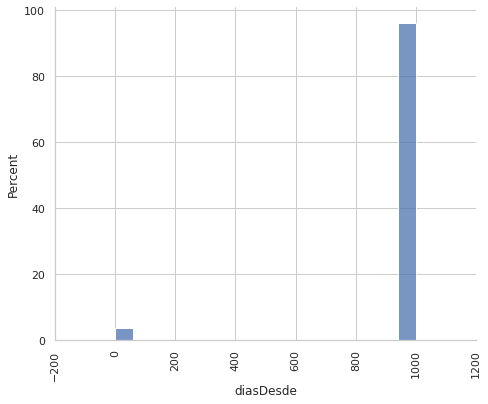

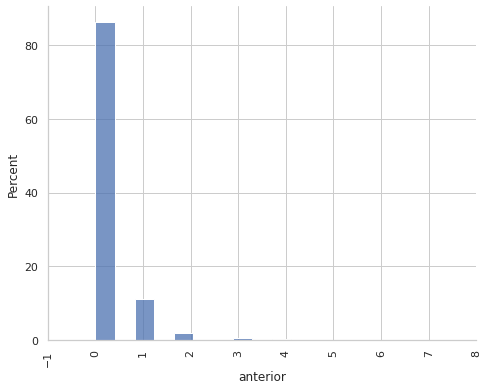

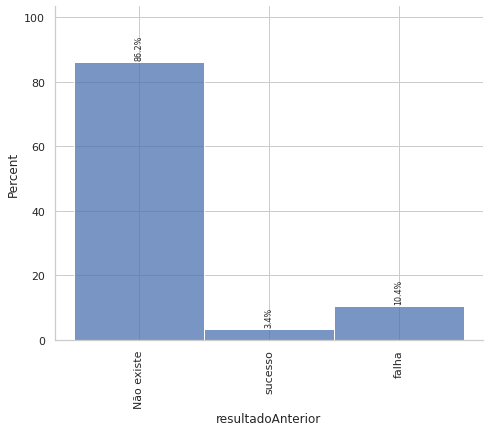

In [74]:
lista_cols = ['contatoCampanha','diasDesde','anterior','resultadoAnterior']

for col in lista_cols:
    fg = sns.displot(df_detalhes, x=col, stat='percent', height=5.5, aspect=1.25)
    if col in ['contatoCampanha','diasDesde','anterior']:
        fg.set_xticklabels(rotation=90)
        plt.show()
    else:
        plot_graph_with_percentage(fg)

**Análise base Inadimplencia**

In [75]:
df_inadimplencia['inadimplência'].unique()

array([999,   0,   1])

In [76]:
(df_inadimplencia['inadimplência'].value_counts()/df_inadimplencia.shape[0])*100

0      78.928680
999    21.062215
1       0.009105
Name: inadimplência, dtype: float64

**Análise base subscrição**

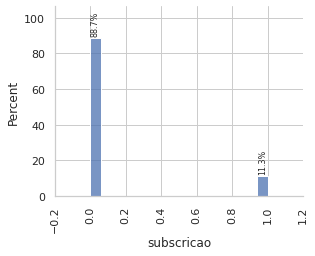

In [77]:
fg = sns.displot(df_subscricao, x='subscricao', stat='percent', height=3.5, aspect=1.25)
plot_graph_with_percentage(fg)

### Cruzar todas as bases de modo que os Id's deem match e depois realizar uma nova anális exploratória buscando entender as relações das variáveis;


In [78]:
df_final = pd.merge(df_cadastro, df_contato, on='ID', how='left')
df_final = pd.merge(df_final, df_detalhes, on='ID', how='left')
df_final['contatoPorDia'] = df_final['contatoCampanha']/df_final['diasDesde']
df_final = pd.merge(df_final, df_inadimplencia, on='ID', how='left')
df_final = pd.merge(df_final, df_subscricao, on='ID', how='left')
df_final.head()

,ID,ocupacao,estadoCivil,educacao,creditoImob,emprestimo,contatos,duracao,log_duracao,contatoCampanha,diasDesde,anterior,resultadoAnterior,contatoPorDia,inadimplência,subscricao
0,e0bdea26-ac80-482e-90a7-9accc402e3ef,operario,married,fundamental,0,0,celular,227,5.424950,4,999,0,Não existe,0.004004,999,0
1,869221fb-841d-4e45-9c90-c3b96a3e964e,empreendedor,married,graduacao,0,0,telefone,202,5.308268,2,999,1,falha,0.002002,0,0
2,946b21f9-30c8-41af-a892-3154b86ff73d,Autonomo,married,primario incompleto,0,0,celular,1148,7.045777,1,999,0,Não existe,0.001001,0,1
3,27b04d91-a83a-4d27-a1f4-c5032dcf21df,administrador,married,graduacao,1,0,telefone,120,4.787492,2,999,0,Não existe,0.002002,0,0
4,760d6808-c51c-40c7-b442-5c18e10201e6,Autonomo,divorced,graduacao,0,0,celular,368,5.908083,2,999,0,Não existe,0.002002,0,0


In [79]:
df_final.shape

(32950, 16)

In [80]:
len(df_final['ID'].unique())

32950

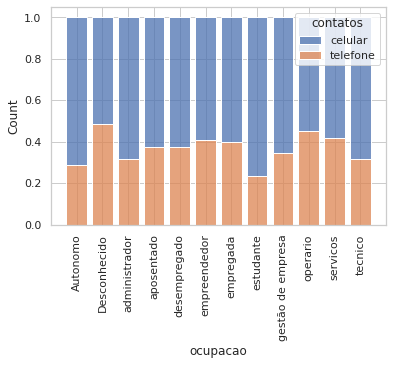

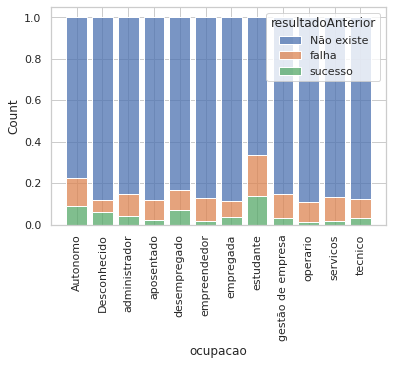

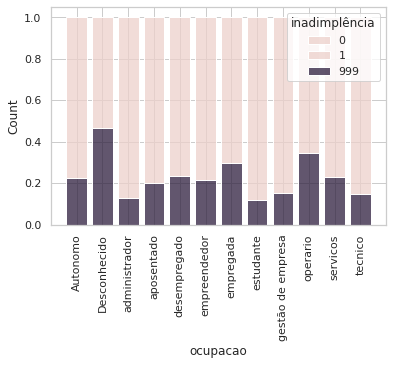

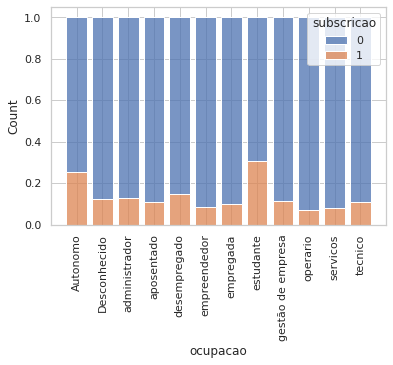

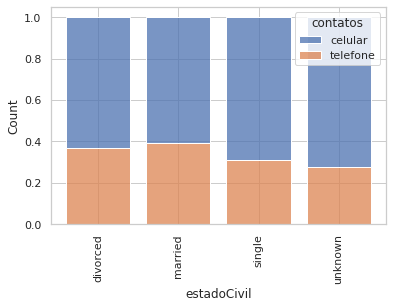

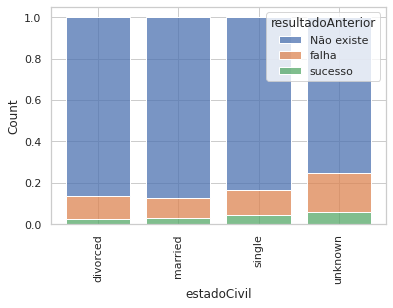

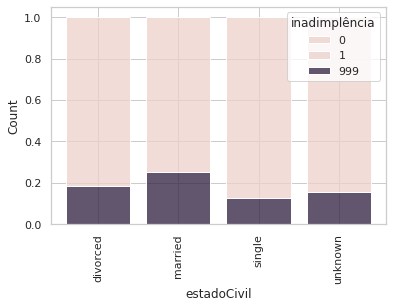

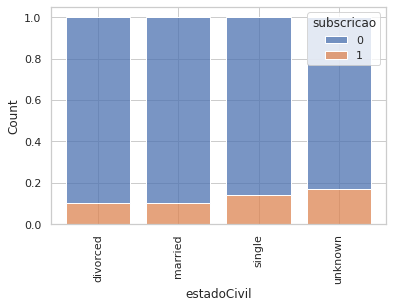

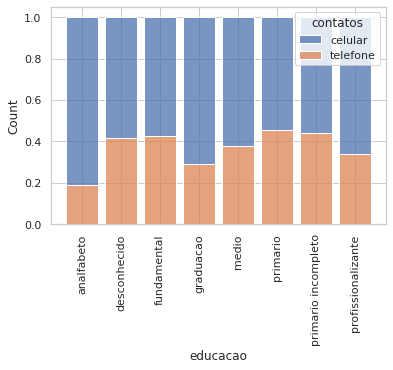

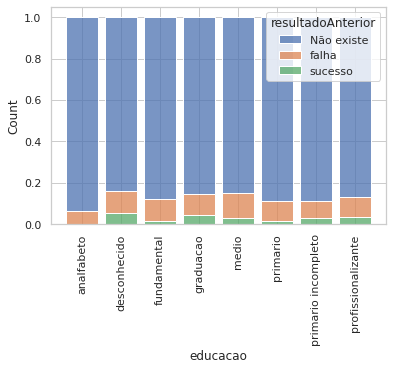

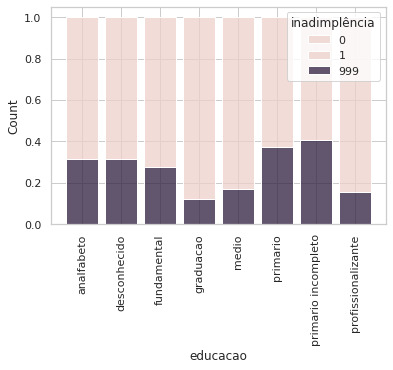

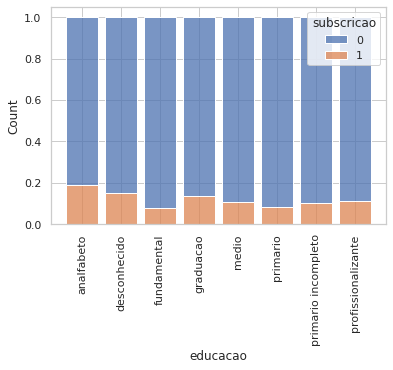

In [83]:
lista_cols = ['ocupacao', 'estadoCivil', 'educacao']
vars_ = ['contatos','resultadoAnterior', 'inadimplência', 'subscricao']

for col in lista_cols:
    for var in vars_:
        aed_multiple_features(col, var, df_final)

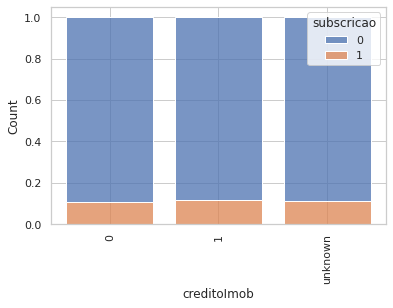

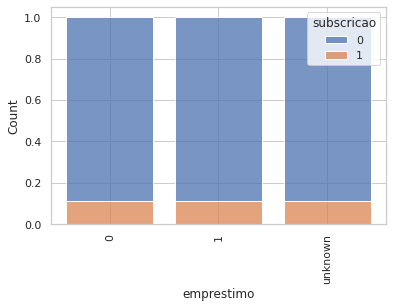

/home/rosana/.local/lib/python3.10/site-packages/seaborn/distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


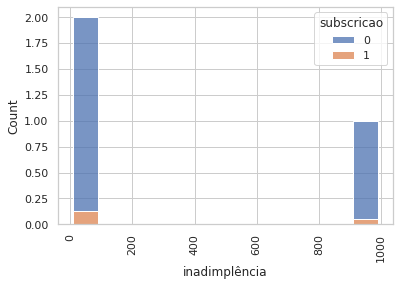

In [84]:
lista_cols = ['creditoImob','emprestimo', 'inadimplência']
vars_ = ['subscricao']

for col in lista_cols:
    for var in vars_:
        aed_multiple_features(col, var, df_final)

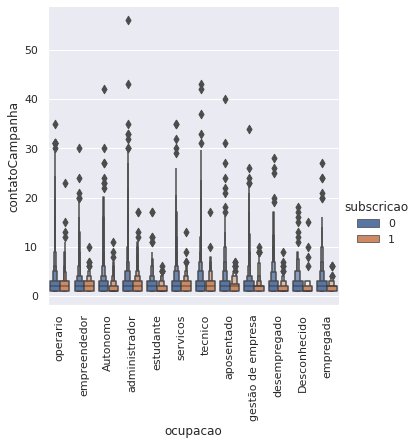

In [97]:
fg = sns.catplot(data=df_final, x='ocupacao', y='contatoCampanha', hue='subscricao', kind='boxen')
plt.xticks(rotation=90)
plt.show()

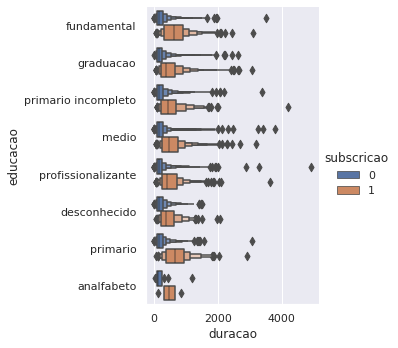

In [100]:
fg = sns.catplot(df_final, x='duracao', y='educacao', hue='subscricao', kind='boxen')
plt.show()

<AxesSubplot:xlabel='duracao', ylabel='contatoCampanha'>

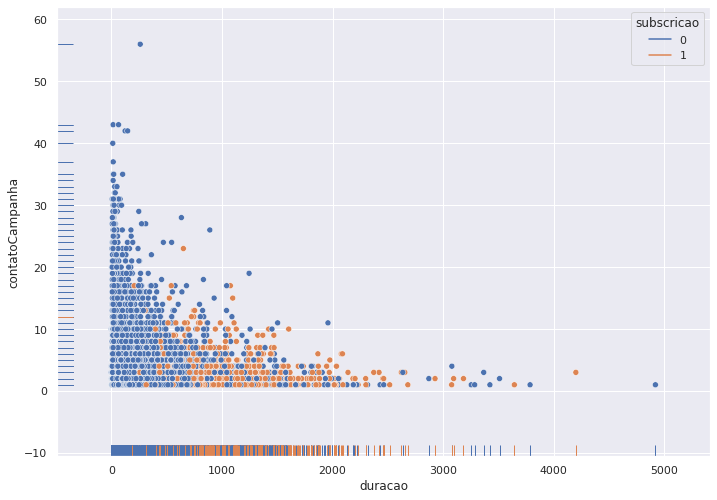

In [101]:
sns.scatterplot(df_final, x='duracao', y='contatoCampanha', hue='subscricao')
sns.rugplot(df_final, x='duracao', y='contatoCampanha', hue='subscricao')

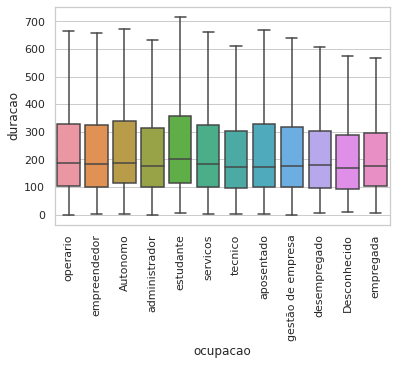

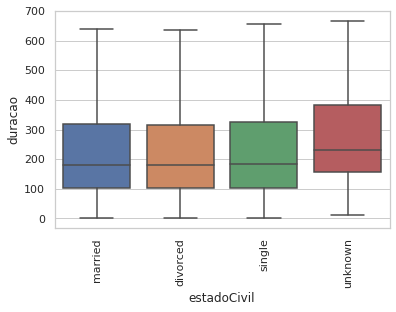

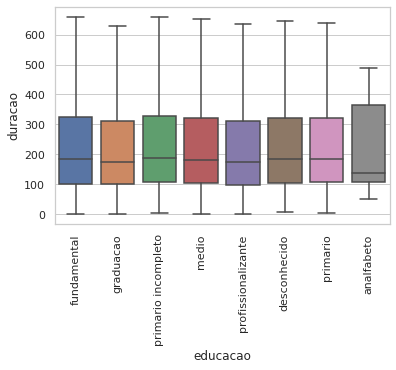

In [85]:
lista_cols = ['ocupacao', 'estadoCivil', 'educacao']

for col in lista_cols:
    sns.set(style="whitegrid")
    fg = sns.boxplot(x=col,y="duracao", data=df_final, showfliers=False)
    fg.set_xticklabels(fg.get_xticklabels(),rotation=90)
    plt.show()

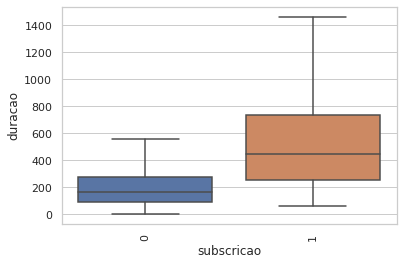

In [86]:
sns.set(style="whitegrid")
fg = sns.boxplot(x='subscricao',y="duracao", data=df_final, showfliers=False)
fg.set_xticklabels(fg.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
df_final['contatoPorDia'] = df_final['contatoCampanha']/df_final['diasDesde']

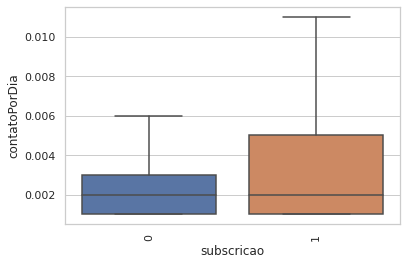

In [87]:
sns.set(style="whitegrid")
fg = sns.boxplot(x='subscricao',y="contatoPorDia", data=df_final, showfliers=False)
fg.set_xticklabels(fg.get_xticklabels(),rotation=90)
plt.show()

### Apresentar uma conclusão das análises de modo que ajudem a entender os dados


In [ ]:
Os dados combinam informações de pessoas dada a sua ocupação, estado civil e educação, 
indicando se esta pessoa possui credito imobiliário, emprestimo e se é inadimplente. 
Os dados linka essas informações as de uma empresa que inicia uma campanha e faz contatos com os clientes,
através de celular ou telefone, registrando o número de dias e a quantidade de contatos que são feitos, 
a fim de finalizar ou não a subscrição (venda/assinatura) de um determinado produto.

### A nossa variável de interesse é a subscrição, fazer as análises de modo que possamos entender quais variáveis mais influenciam nela;


In [65]:
def correlation(corr_matrix):

    plt.figure(figsize=(10,10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
               yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, annot=True, linewidths=.5, cbar_kws={'shrink':.82})
    plt.title('Heatmap of correlation matrix')

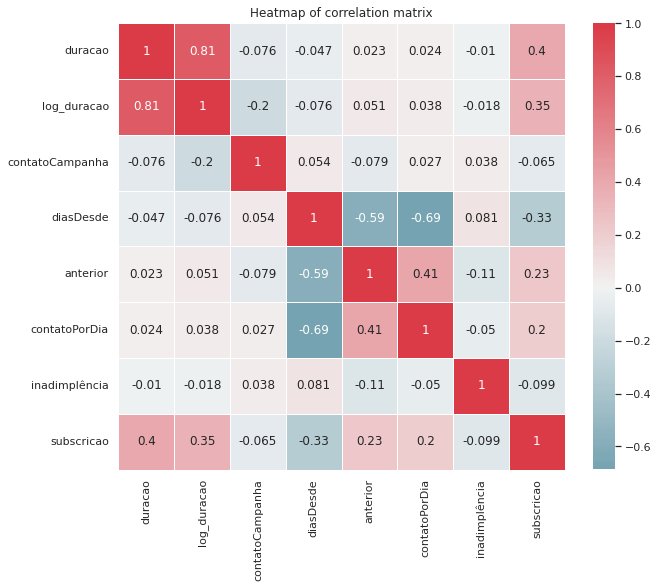

In [66]:
correlation(df_final.corr())

### Na conclusão trazer percepções que sejam relevantes para negócio;

Administradores possuem o maior percentuam representando 25.2% dos dados, seguido de operario com 22,6% e tecnico com 16,4%.
Casados possuem o maior percentual com pouco mais de 60.6%, seguido de solteiros 28.1% e divorciados com 11.2%.
Em educação os de graduação possuem o maior percentual, representando 29,5% dos dados, seguido do médio 23,1% e 14,6% do fundamental.
As variaveis de ocupação, educação e estado civil não diferenciam quanto ao contratação de credito imobiliário e emprestimo. Sendo que de forma igualitária a maioria contrata o crédito imobiliário, enquanto grande maioria não faz empréstimo.
A maioria dos contatos são feitos para celular, e em média o tempo de duração da ligação é próximo tanto para celular quanto para telefone, tendo duração média de 180 seg.
DiasDesde possui 96% de dados como 999 e mais de 86,2% dos dados possui status de resultadoAnterior como Não existe.
Mais de 78% não possui inadimplencia 
Mais de 88% com subscrição igual a 0
Os dados tem mostrado uma relação forte entre a variável duração e contatoCampanha, quanto maior o tempo de duração e menor o número de contatoCampanha maior são as chamces de conversão, ou seja, de subscrever. Em média o tempo de duração é próximo tanto para ocupação, estadocivil ou educação. Para aqueles que subscrevem o tempo de duração é em média 420 seg, enquanto para os que não subscrevem o tempo é inferior a 200 seg.
O boxplot final comprova a relação entre contatoCampanha e diasDesde, ou seja, se diasDesde (quantidade de dias em que ocorrem as ligações) foi menor e o contatoCampanha for maior, as chances de subscrição em maior. Caso diasDesde for um número alto e o contatoCampanha for menor as chances de subscrição será menor.
Por conclusão, de fundamental importância as variáveis duração e contatoCampanha.